**KNN algorithm to find if a player is the man of the match or not**

In [ ]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import io
from io import StringIO

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving KNN_Train.xlsx to KNN_Train.xlsx


In [ ]:
data=pd.read_excel(io.BytesIO(uploaded['KNN_Train.xlsx'])) 
data.head()

,Label,Name,Runs,Team_Runs,is_MoM,MoM_Label
0,1,Dhawan,85,190,YES,1
1,2,PP Shaw,72,190,NO,0
2,3,SK Raina,54,188,NO,0
3,4,N Rana,80,187,YES,1
4,5,KL Rahul,91,221,YES,1


In [ ]:
Result= dict(zip(data.MoM_Label.unique(),
data.is_MoM.unique()))
Result

{0: 'NO', 1: 'YES'}

In [ ]:
x = data[['Runs', 'Team_Runs']]
y = data['MoM_Label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
knn.score(x_test,y_test)*100

60.0

In [ ]:
error_rate = []
# Will take some time
for i in range(1,20,2):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

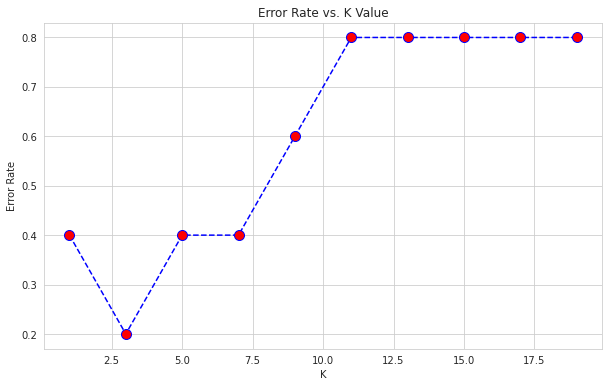

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We used k=7 but now the optimal value of K is found to be at 3. The graph of the error rate increases after 3. This means k=3 would give a better score for our model. So now we retrain with new K value, k=3

**Retraining with K=3**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
improved_knn = KNeighborsClassifier(n_neighbors = 3)

In [ ]:
improved_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
improved_knn.score(x_train,y_train)*100

80.0

In [ ]:
improved_knn.score(x_test,y_test)*100

80.0

Here we can see that the score has been increased from 60 to 80

**Testing**

In [ ]:
#PP SHAW (53,159) YES = Right
prediction = improved_knn.predict([[53,159]])
Result[prediction[0]]

'YES'

In [ ]:
#AB de Villiers (75,171) YES = Right
prediction = improved_knn.predict([[75,171]])
Result[prediction[0]]

'YES'

In [ ]:
#R Gaikwad (75,173) YES = Right
prediction = improved_knn.predict([[75,173]])
Result[prediction[0]]

'YES'

In [ ]:
#F du Plessis (56,173) NO = Right
prediction = improved_knn.predict([[56,173]])
Result[prediction[0]]

'NO'

In [ ]:
#Dhawan(69,167) NO = Wrong
prediction = improved_knn.predict([[69,167]])
Result[prediction[0]]

'YES'

In [ ]:
#26 October, 2020 KKR Vs KIXP CH Gayle(51,150) YES = Right
prediction = improved_knn.predict([[51,150]])
Result[prediction[0]]

'YES'